# Advanced: ipywidgets

Hate manually parameters and re-running your code for a parameter change? Ever want to interact with your data using a GUI? 

[ipywidgets](https://github.com/ipython/ipywidgets) allows you to easily link up Python code with user interface widgets.

They provide [documentation in the form of tutorials and examples](https://github.com/ipython/ipywidgets/blob/master/examples/Index.ipynb) on their Github site.

Let's continue the demonstration of Planck's equation by incorporating some interactivity:

## Installation

First, install `ipywidgets` using either `pip` or `conda`:

`pip`:
``` bash
pip install ipywidgets
```

`conda`:
``` bash
conda install ipywidgets
```

## Example

First we'll get our code from [our basic demonstration](3_basic_demo.ipynb):

In [1]:
# Import numpy and alias to "np"
import numpy as np
# Import and alias to "plt"
import matplotlib.pyplot as plt


def planck(wavelength, temp):
    """ Return the emitted radiation from a blackbody of a given temp and wavelength
    
    Args:
        wavelength (float): wavelength (m)
        temp (float): temperature of black body (Kelvin)
        
    Returns:
        float: spectral radiance (W / (sr m^3))
        
    """
    k_b = 1.3806488e-23  # J/K  Boltzmann constant
    h = 6.626070040e-34  # J s - Planck's constant
    c = 3e8  # m/s - speed of light
    
    return ((2 * h * c ** 2) / wavelength ** 5 * 
            1 / (np.exp(h * c / (wavelength * k_b * temp)) - 1))

Let's also combine our plotting code into a cohesive function:

In [2]:
def plot_planck(temp):
    """ Plot the spectral radiance for a blackbody of a given temperature
    
    Args:
        temp (float): temperature of body
        
    """
    wavelength = np.linspace(1e-8, 10e-6, 1000)
    
    
    rad = planck(wavelength, temp)
    
    text_x = wavelength[rad.argmax()] * 1e6
    text_y = rad.max() / 1e3 / 1e9
    temp_str = '%.2f K' % temp
    
    fig, ax = plt.subplots()
    
    ax.plot(wavelength * 1e6, rad / 1e3 / 1e9)
    ax.text(text_x, text_y, temp_str, ha='center')

    ax.set_xlabel(r'Wavelength ($\mu m$)')
    ax.set_ylabel(r'Spectral radiance ($kW \cdot sr^{-1} \cdot m^{-2} \cdot nm^{-1}$)')
    
    ax.set_xlim([1e-8 * 1e6, 10e-6 * 1e6])

Now we can tie our plot function, `plot_planck`, to the `interact` function from `ipywidgets`:

<IPython.core.display.Javascript object>


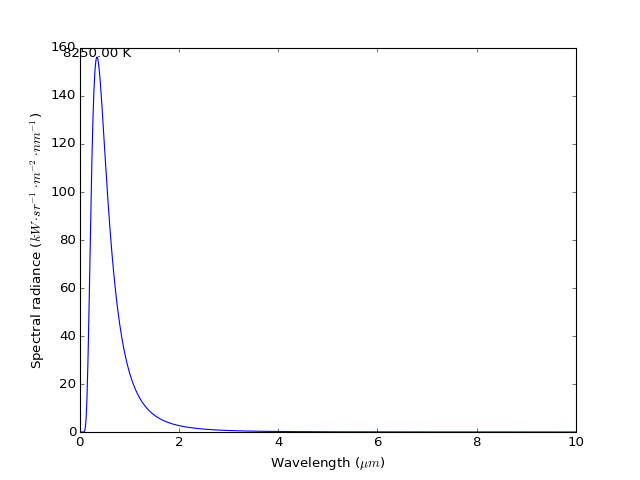

In [4]:
%matplotlib nbagg
from ipywidgets import interactive
from IPython.core.display import display

vis = interactive(plot_planck, temp=(250, 10e3, 100))
display(vis)